In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [103]:
# from csv to df
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [104]:
calories.head()


User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [105]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [106]:
exercise_data=pd.read_csv('exercise.csv')
# combining datas

calories_data= pd.concat([exercise_data, calories['Calories']], axis=1)
calories_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [107]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [108]:
#data stat
calories_data.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [109]:
calories_data.shape

(15000, 9)

In [110]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

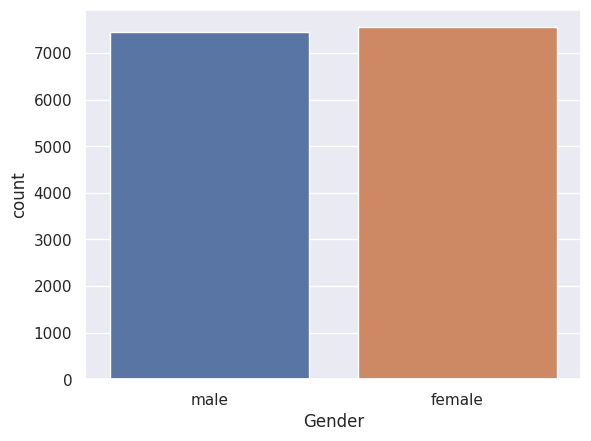

In [111]:
# visualization

sns.set()

sns.countplot(x='Gender', data=calories_data, hue='Gender')
plt.show()

<Axes: xlabel='Height', ylabel='Density'>

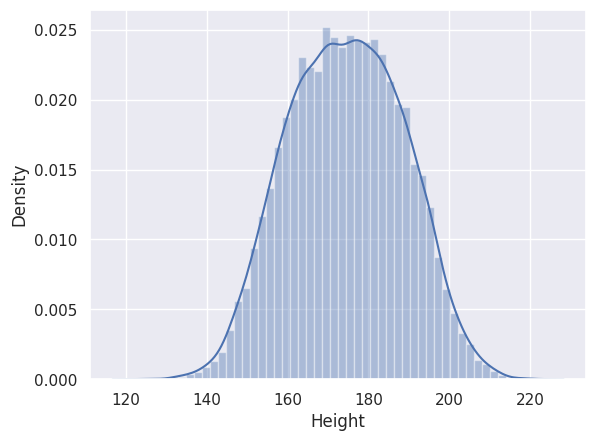

In [112]:
sns.distplot(calories_data['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

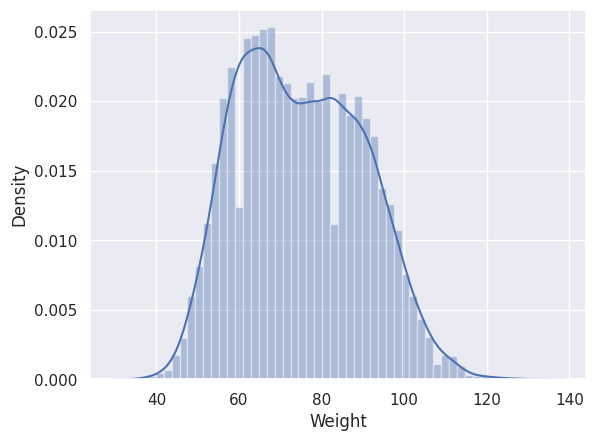

In [113]:
sns.distplot(calories_data['Weight'])

<Axes: xlabel='Age', ylabel='Density'>

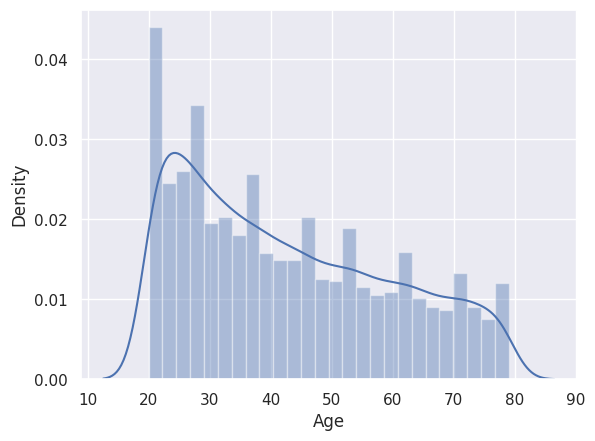

In [114]:
sns.distplot(calories_data['Age'])

<Axes: xlabel='Heart_Rate', ylabel='Density'>

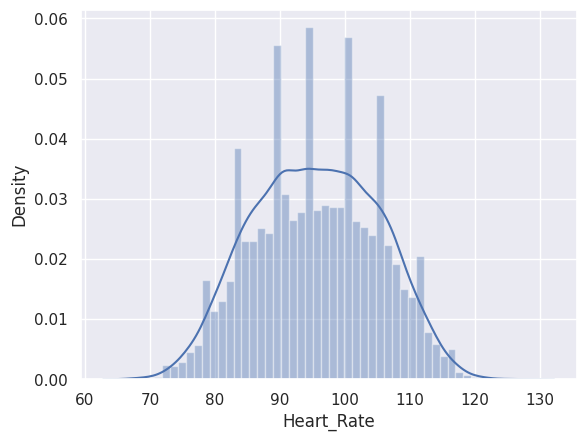

In [115]:
sns.distplot(calories_data['Heart_Rate'])

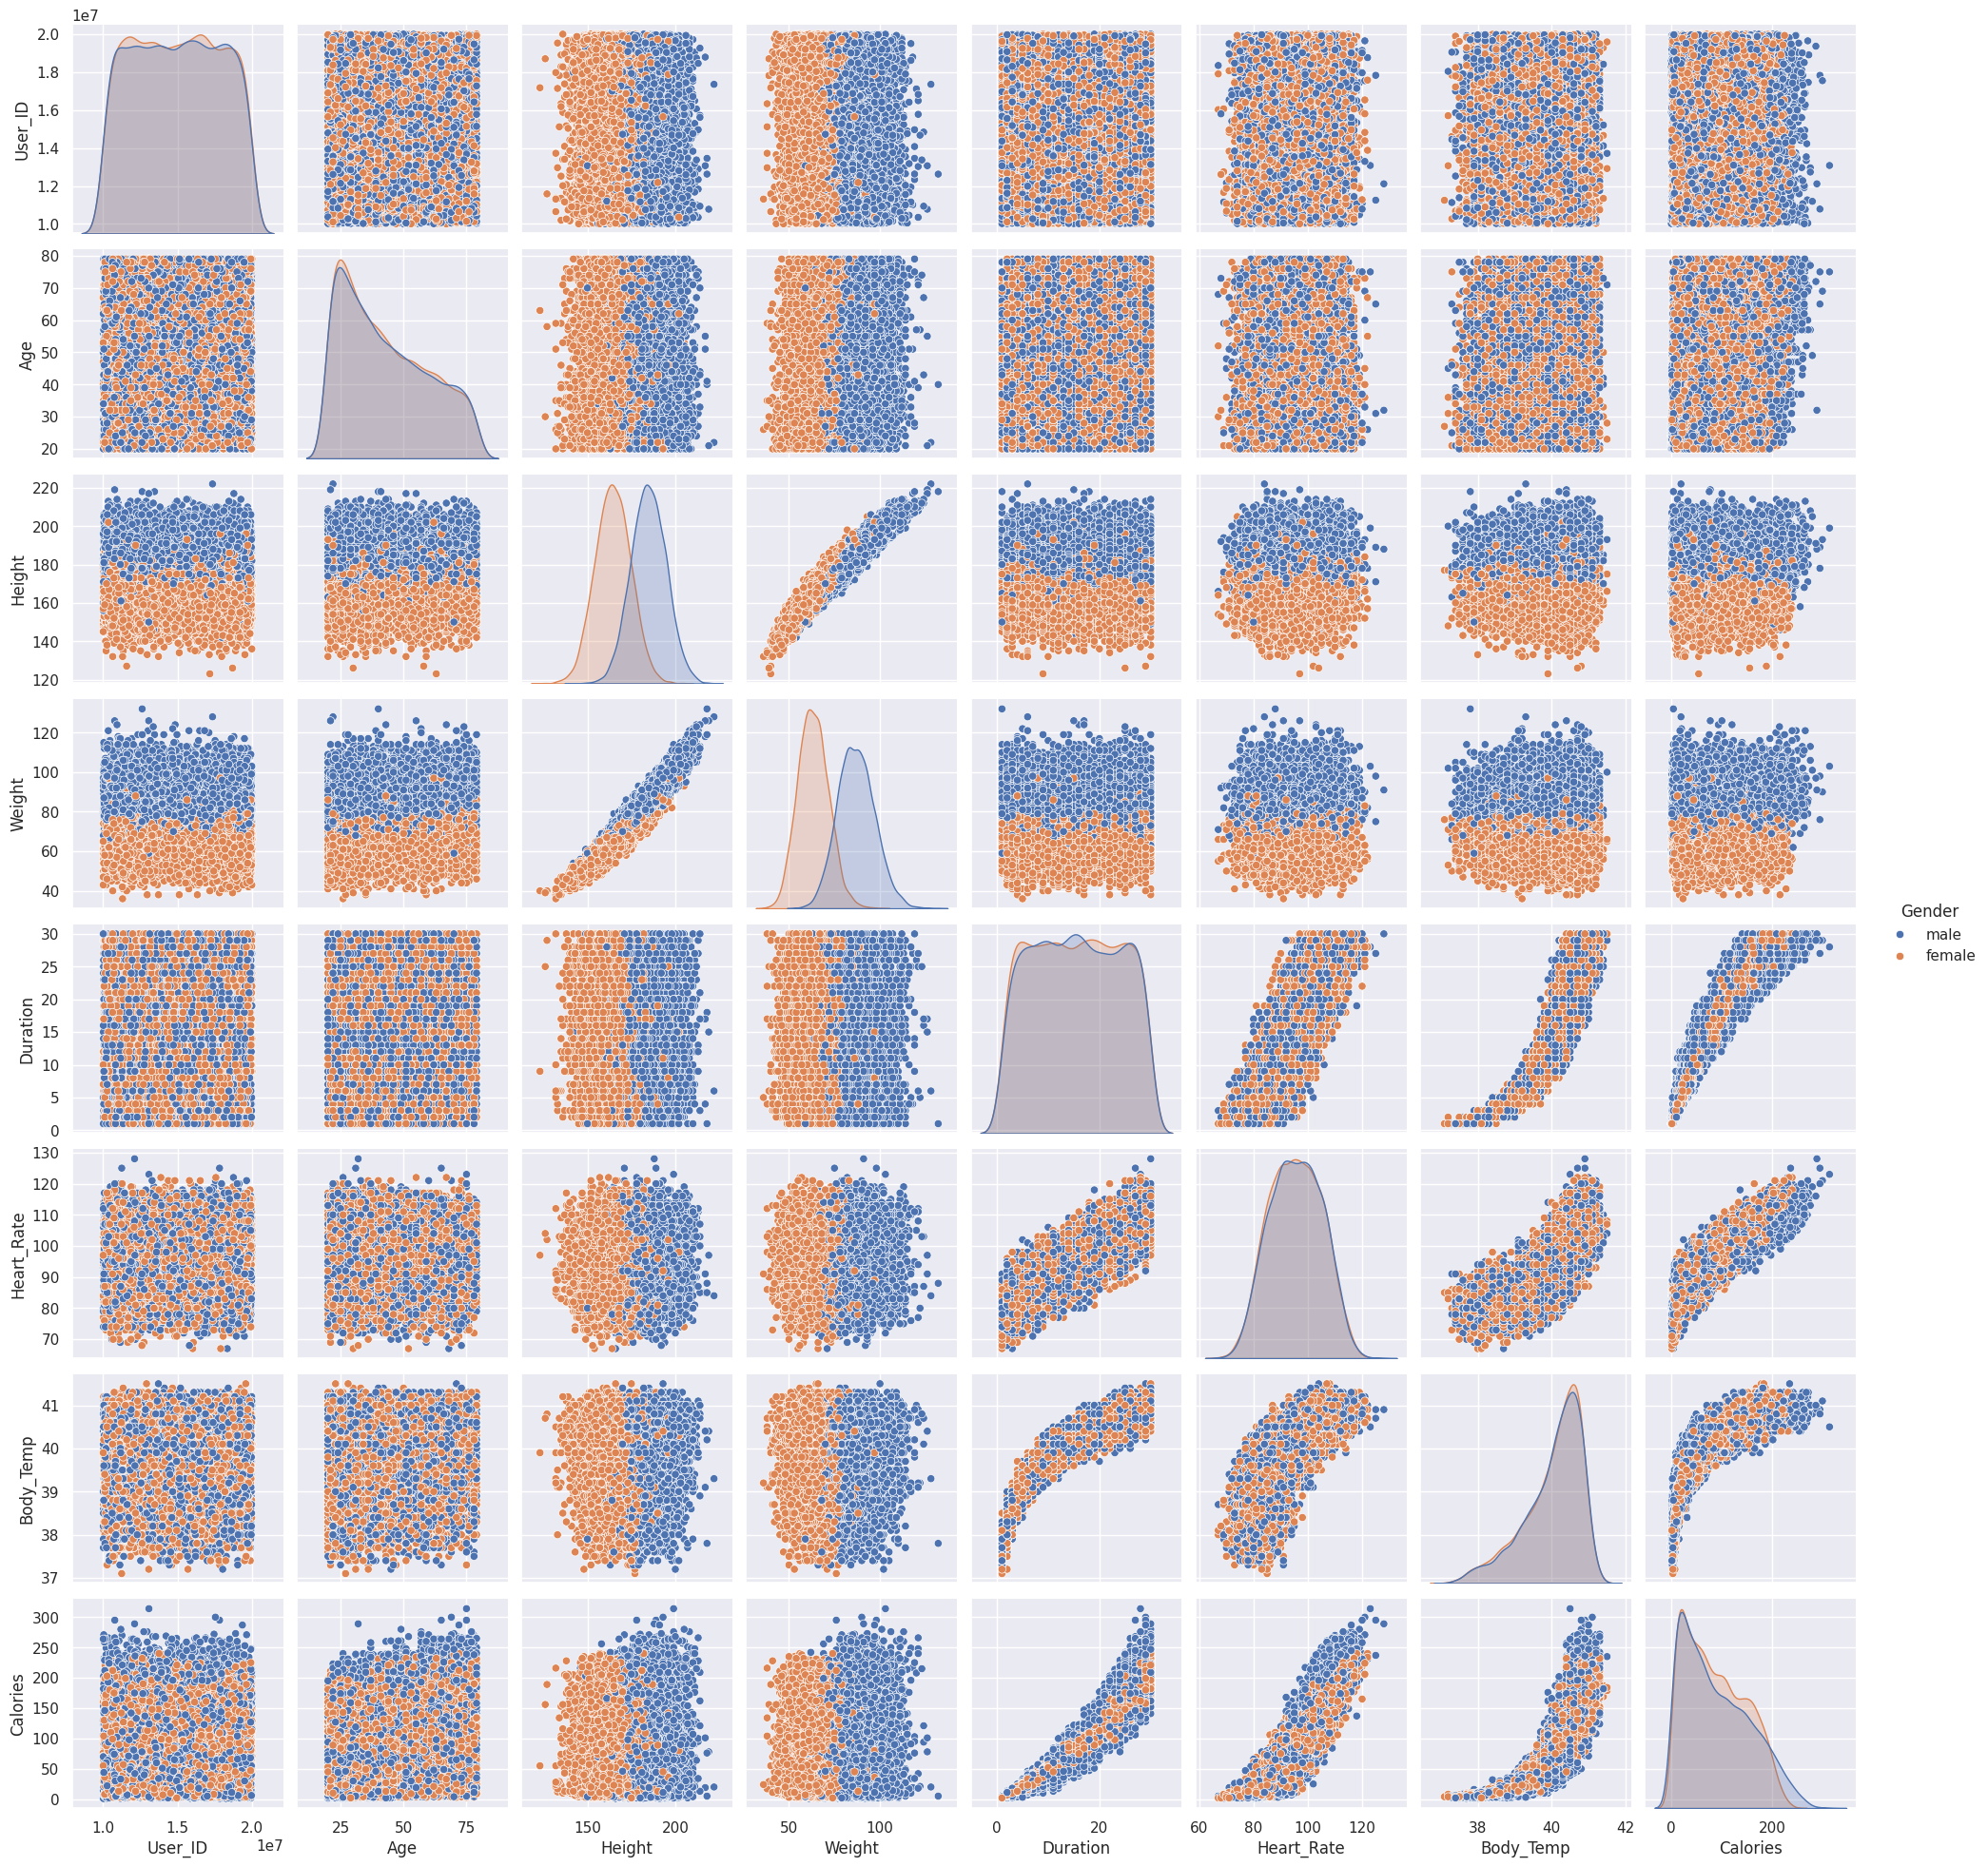

In [116]:
sns.pairplot(calories_data, hue='Gender')
plt.show()

In [117]:
# from object to int: in gender data, data preprocessing

calories_data.replace({'Gender':{'male':0, 'female':1}}, inplace=True)
calories_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [118]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Feature Engineering: Calculate BMI from height and weight
calories_data['BMI'] = calories_data['Weight'] / ((calories_data['Height'] / 100) ** 2)

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
calories_data['Age'] = imputer.fit_transform(calories_data[['Age']])

# Scale the features (standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(calories_data.drop(columns=['Calories', 'User_ID']))

In [119]:
# Defining X and Y features
X=calories_data.drop(columns=['Calories', 'User_ID'], axis=1)
Y=calories_data['Calories']
print(X)

       Gender   Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0           0  68.0   190.0    94.0      29.0       105.0       40.8   
1           1  20.0   166.0    60.0      14.0        94.0       40.3   
2           0  69.0   179.0    79.0       5.0        88.0       38.7   
3           1  34.0   179.0    71.0      13.0       100.0       40.5   
4           1  27.0   154.0    58.0      10.0        81.0       39.8   
...       ...   ...     ...     ...       ...         ...        ...   
14995       1  20.0   193.0    86.0      11.0        92.0       40.4   
14996       1  27.0   165.0    65.0       6.0        85.0       39.2   
14997       1  43.0   159.0    58.0      16.0        90.0       40.1   
14998       0  78.0   193.0    97.0       2.0        84.0       38.3   
14999       0  63.0   173.0    79.0      18.0        92.0       40.5   

             BMI  
0      26.038781  
1      21.773842  
2      24.655910  
3      22.159109  
4      24.456063  
...          ...  
14

In [120]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [121]:
# training and testing data
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


# Hyperparameter Tuning: Using GridSearchCV for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, Y_train)


(15000, 8) (12000, 8) (3000, 8)
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [122]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [123]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)


[125.22695  227.02249   40.623695 ... 143.99947   23.49855   91.54014 ]


Mean Absolute Error:  1.5287106871604919
R2 Score:  0.9987367744792888
rmse:  2.2274401567124316


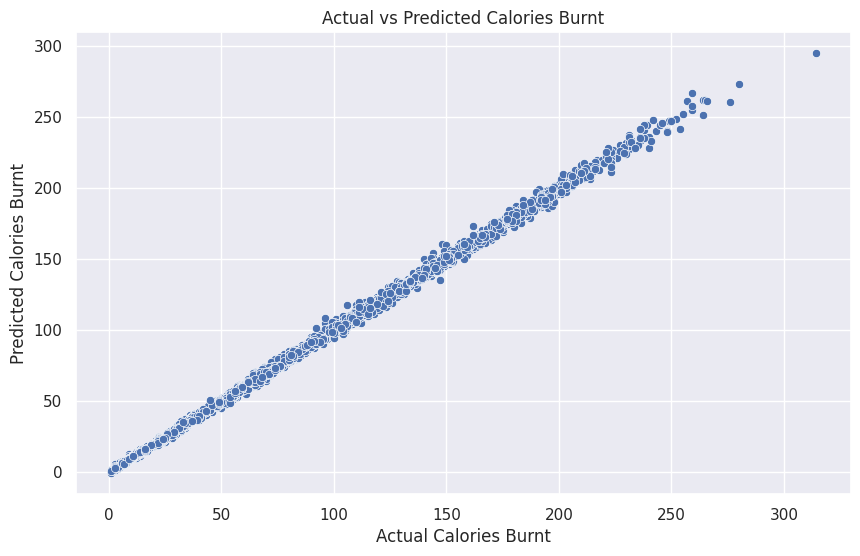

In [124]:
#mean absolute error
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
r2_score = metrics.r2_score(Y_test, test_data_prediction)
rmse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))


print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2_score)
print("rmse: ", rmse)

# actual vs predicted values
plt.figure(figsize=(10,6))
sns.scatterplot(x=Y_test, y=test_data_prediction)
plt.xlabel("Actual Calories Burnt")
plt.ylabel("Predicted Calories Burnt")
plt.title("Actual vs Predicted Calories Burnt")
plt.show()

Cross-Validation MAE Scores: [-1.09648797 -1.06255624 -1.04201907 -1.08558773 -1.09058221]
Mean Cross-Validation MAE: -1.0754466443751007


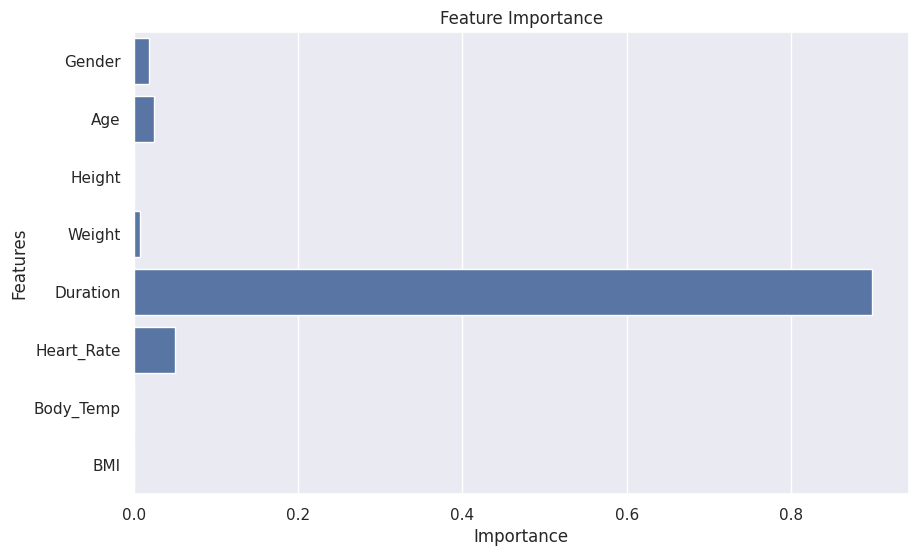

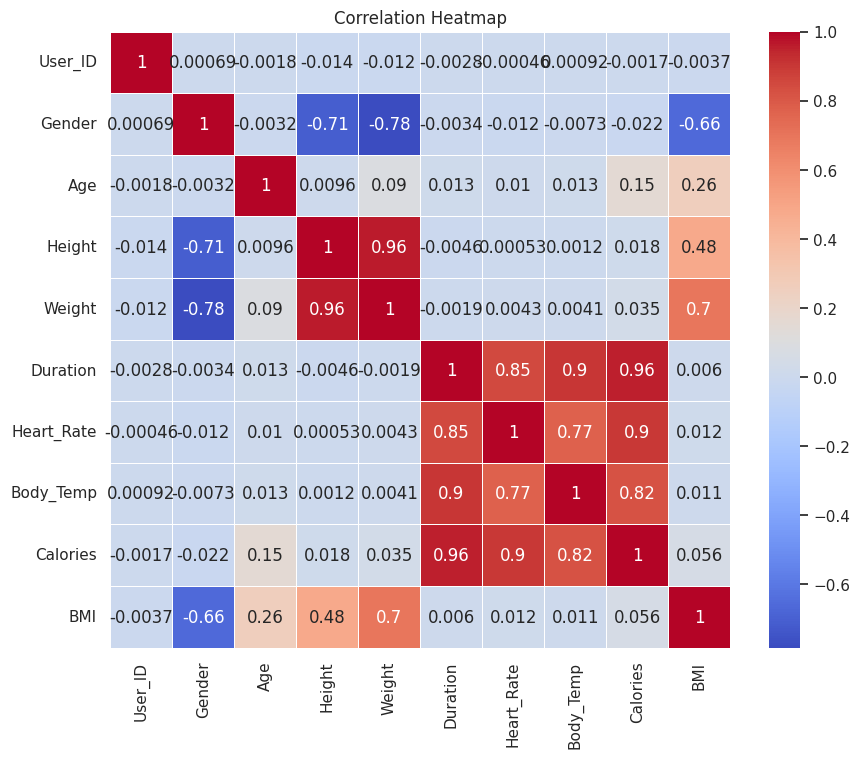

In [125]:
# Cross-validation to evaluate model performance
cv_scores = cross_val_score(best_model, X, Y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE Scores: {cv_scores}")
print(f"Mean Cross-Validation MAE: {cv_scores.mean()}")

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=best_model.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualizations
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = calories_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()